<a href="https://colab.research.google.com/github/Ishita95-Harvard/Comprehensive-research-analyst-intelligent-agent-based-network-/blob/main/n8n_based_intelligent_agent_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
print("Structure of X_train:")
print(X_train.info())
print("\nFirst 5 rows of X_train:")
display(X_train.head())

Structure of X_train:
<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 54 to 51
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   S.No                             54 non-null     float64
 1   City_Andheri Palayam PO Tirupur  54 non-null     int64  
 2   City_Delhi                       54 non-null     int64  
 3   City_Faridabad (Haryana)         54 non-null     int64  
 4   City_Gurgaon                     54 non-null     int64  
 5   City_Gurgaon (Haryana)           54 non-null     int64  
 6   City_Hyderabad                   54 non-null     int64  
 7   City_Kolkata                     54 non-null     int64  
 8   City_Lucknow                     54 non-null     int64  
 9   City_Mumbai                      54 non-null     int64  
 10  City_New Delhi                   54 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 5.1 KB
None

First 5 rows of 

,S.No,City_Andheri Palayam PO Tirupur,City_Delhi,City_Faridabad (Haryana),City_Gurgaon,City_Gurgaon (Haryana),City_Hyderabad,City_Kolkata,City_Lucknow,City_Mumbai,City_New Delhi
54,-1.705383,0,0,0,1,0,0,0,0,0,0
55,-1.670632,0,0,0,1,0,0,0,0,0,0
49,0.900986,0,0,0,0,0,0,0,0,0,1
7,1.422260,0,0,0,1,0,0,0,0,0,0
42,0.588222,0,0,0,0,0,0,0,0,0,1


In [1]:
import pandas as pd

df = pd.read_csv('/content/Valion_All_4_Pages_Merged.csv')
display(df.head())

,S.No,Name,Email,Mobile,Address,Area_Sector,City,Remarks
0,82,Mr. Aman Kumar,NaN,919891285486,Tata Telecommunications Apartment 28 E,Communication Apartments,Delhi,NaN
1,85,Mr. Atul Kumar Ahuja,atul.pramod@dnpservices.com,919871488719,2734 New Housing Board Opp State Bank of Patia...,NaN,Gurgaon,N.A.
2,86,Mrs. Kiran Mal,NaN,9811199808,2734 New Housing Board Opp State Bank of Patia...,NaN,Gurgaon,N.A.
3,87,Ms. Yogita Wadhwa,ramesh@indotour.com,919810005151,K-5/11 DLF Phase-II,NaN,Gurgaon,Left
4,88,Mr. Rajat K. Dhawan,rajat_dhawan@kiesco.com,919810825596,R-34 Windsor Court DLF Phase-II,NaN,Gurgaon,Not interested


# Task
The user wants to prepare the provided dataset for machine learning, starting with identifying the target variable.

## Identify Target Variable

### Subtask:
Ask the user to specify the target variable for the machine learning task.


### Subtask
Ask the user to specify the target variable for the machine learning task.

#### Instructions
Please identify the column from the dataset that you would like to use as the target variable for your machine learning task. This is the variable your model will be trained to predict.

**Reasoning**:
To help the user identify the target variable, I will display all column names of the `df` DataFrame.



In [2]:
print("Available columns:")
print(df.columns.tolist())

Available columns:
['S.No', 'Name', 'Email', 'Mobile', 'Address', 'Area_Sector', 'City', 'Remarks']


## Handle Missing Values

### Subtask:
Identify and handle missing values in the dataset. This may involve imputation or removal, depending on the column and the extent of missingness.


**Reasoning**:
To identify and handle missing values, I will first calculate and display the count and percentage of missing values for each column in the DataFrame.



In [3]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

print("Missing values in each column:")
print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

Missing values in each column:
             Missing Count  Missing Percentage (%)
Area_Sector             35               51.470588
Email                   15               22.058824
Remarks                  3                4.411765


### Analysis of Missing Values

From the previous step, we have identified the following columns with missing values:

*   **`Area_Sector`**: Has 35 missing values, accounting for **51.47%** of the data. This is a very high percentage. Depending on its importance to the machine learning task, strategies could include:
    *   **Dropping the column**: If `Area_Sector` is not critical for the model and more than half of its data is missing, it might be best to remove it.
    *   **Advanced Imputation**: If the column is crucial, more sophisticated imputation techniques (e.g., using a separate model to predict missing values, or based on other geographical features if available) might be considered, but this can be complex.
    *   **Imputation with a placeholder**: Impute with a string like 'Unknown' or 'Missing' if it's a categorical column, or with the mode if applicable.

*   **`Email`**: Has 15 missing values, accounting for **22.06%** of the data. This is a moderate percentage.
    *   **Imputation with a placeholder**: Replace missing emails with a string like 'No Email Provided' or 'Missing'.
    *   **Dropping rows**: If the `Email` column is essential and cannot be imputed meaningfully, rows with missing values could be dropped, but this might lead to data loss.
    *   **Dropping the column**: If email addresses are not relevant features for the prediction task, this column could be dropped.

*   **`Remarks`**: Has 3 missing values, accounting for **4.41%** of the data. This is a relatively small percentage.
    *   **Imputation with a placeholder**: Replace missing remarks with 'No Remarks' or 'Missing'.
    *   **Dropping rows**: Given the small number, dropping these rows would have minimal impact on the dataset size.

**Please specify how you would like to handle the missing values for each of these columns.**

## Handle Missing Values

### Subtask:
Handle missing values in the dataset by dropping the 'Area_Sector' column and imputing missing values in 'Email' and 'Remarks' columns.


**Reasoning**:
I will drop the 'Area_Sector' column, impute missing values in 'Email' and 'Remarks' columns, and then verify that all missing values have been handled.



In [4]:
df = df.drop('Area_Sector', axis=1)
df['Email'] = df['Email'].fillna('No Email Provided')
df['Remarks'] = df['Remarks'].fillna('No Remarks')

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
S.No       0
Name       0
Email      0
Mobile     0
Address    0
City       0
Remarks    0
dtype: int64


## Encode Categorical Features

### Subtask:
Convert categorical features into a numerical format suitable for machine learning models using appropriate encoding techniques.


**Reasoning**:
To identify categorical columns, I will first display the data types of all columns in the DataFrame.



In [5]:
print(df.dtypes)

S.No        int64
Name       object
Email      object
Mobile      int64
Address    object
City       object
Remarks    object
dtype: object


**Reasoning**:
To determine the appropriate encoding strategy, I need to inspect the number of unique values and value counts for each categorical column ('Name', 'Email', 'Address', 'City', 'Remarks'). This will help decide if one-hot encoding, label encoding, or dropping the column is most suitable based on cardinality.



In [6]:
for col in ['Name', 'Email', 'Address', 'City', 'Remarks']:
    print(f"Column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(df[col].value_counts().head())
    print("\n")

Column: Name
Number of unique values: 62
Name
Mr. Nitish Kumar Roy       4
Mr. Rajat K. Dhawan        2
Ms. Meenu Bhargava         2
Mr. Ramesh Kumar Wadhwa    2
Ms. Yogita Wadhwa          1
Name: count, dtype: int64


Column: Email
Number of unique values: 46
Email
No Email Provided              15
roynitish@gmail.com             4
ramesh@indotour.com             3
rajat_dhawan@kiesco.com         2
rajat_bhargava@mckinsey.com     2
Name: count, dtype: int64


Column: Address
Number of unique values: 56
Address
A-12/7, DLF City PH-I                                            3
2734 New Housing Board Opp State Bank of Patiala Cantt Branch    2
No. 17 Sukhchain Marg                                            2
R-34 Windsor Court DLF Phase-II                                  2
D-7 Uniworld City                                                2
Name: count, dtype: int64


Column: City
Number of unique values: 10
City
Gurgaon              37
New Delhi            16
Gurgaon (Haryana)     4
Mu

**Reasoning**:
Based on the analysis of unique values, 'Name', 'Email', 'Address', and 'Remarks' columns have very high cardinality, making them unsuitable for direct one-hot encoding without further feature engineering or domain knowledge. These columns often act as identifiers rather than predictive features in their raw form. The 'City' column, with 10 unique values, is suitable for one-hot encoding. Therefore, I will drop the high cardinality columns ('Name', 'Email', 'Address', 'Remarks') and apply one-hot encoding to the 'City' column.



In [7]:
df_encoded = df.copy()
df_encoded = df_encoded.drop(columns=['Name', 'Email', 'Address', 'Remarks'])
df_encoded = pd.get_dummies(df_encoded, columns=['City'], prefix='City', dtype=int)

print("DataFrame after encoding and dropping high cardinality columns:")
display(df_encoded.head())
print("\nData types after encoding:")
print(df_encoded.dtypes)

DataFrame after encoding and dropping high cardinality columns:


,S.No,Mobile,City_Andheri Palayam PO Tirupur,City_Delhi,City_Faridabad (Haryana),City_Gurgaon,City_Gurgaon (Haryana),City_Hyderabad,City_Kolkata,City_Lucknow,City_Mumbai,City_New Delhi
0,82,919891285486,0,1,0,0,0,0,0,0,0,0
1,85,919871488719,0,0,0,1,0,0,0,0,0,0
2,86,9811199808,0,0,0,1,0,0,0,0,0,0
3,87,919810005151,0,0,0,1,0,0,0,0,0,0
4,88,919810825596,0,0,0,1,0,0,0,0,0,0



Data types after encoding:
S.No                               int64
Mobile                             int64
City_Andheri Palayam PO Tirupur    int64
City_Delhi                         int64
City_Faridabad (Haryana)           int64
City_Gurgaon                       int64
City_Gurgaon (Haryana)             int64
City_Hyderabad                     int64
City_Kolkata                       int64
City_Lucknow                       int64
City_Mumbai                        int64
City_New Delhi                     int64
dtype: object


## Feature Importance

### Subtask:
Calculate and visualize feature importance to understand which features contribute most to predicting the target variable.


### Define Target Variable

#### Instructions
Please define your target variable by assigning the column name (as a string) from the `df_encoded` DataFrame to a variable named `TARGET_COLUMN`. For example, if 'Mobile' is your target, you would write `TARGET_COLUMN = 'Mobile'`.

Here are the available columns in `df_encoded` to help you choose:
`['S.No', 'Mobile', 'City_Andheri Palayam PO Tirupur', 'City_Delhi', 'City_Faridabad (Haryana)', 'City_Gurgaon', 'City_Gurgaon (Haryana)', 'City_Hyderabad', 'City_Kolkata', 'City_Lucknow', 'City_Mumbai', 'City_New Delhi']`

**Reasoning**:
Now that the user has been prompted to define the target variable, I will proceed with preparing the features and target, training a Random Forest Regressor model, extracting feature importances, and visualizing them as per the subtask instructions. This code block will implement steps 2 through 6 of the subtask.



Assuming TARGET_COLUMN = 'Mobile' for demonstration. Please define it explicitly if different.


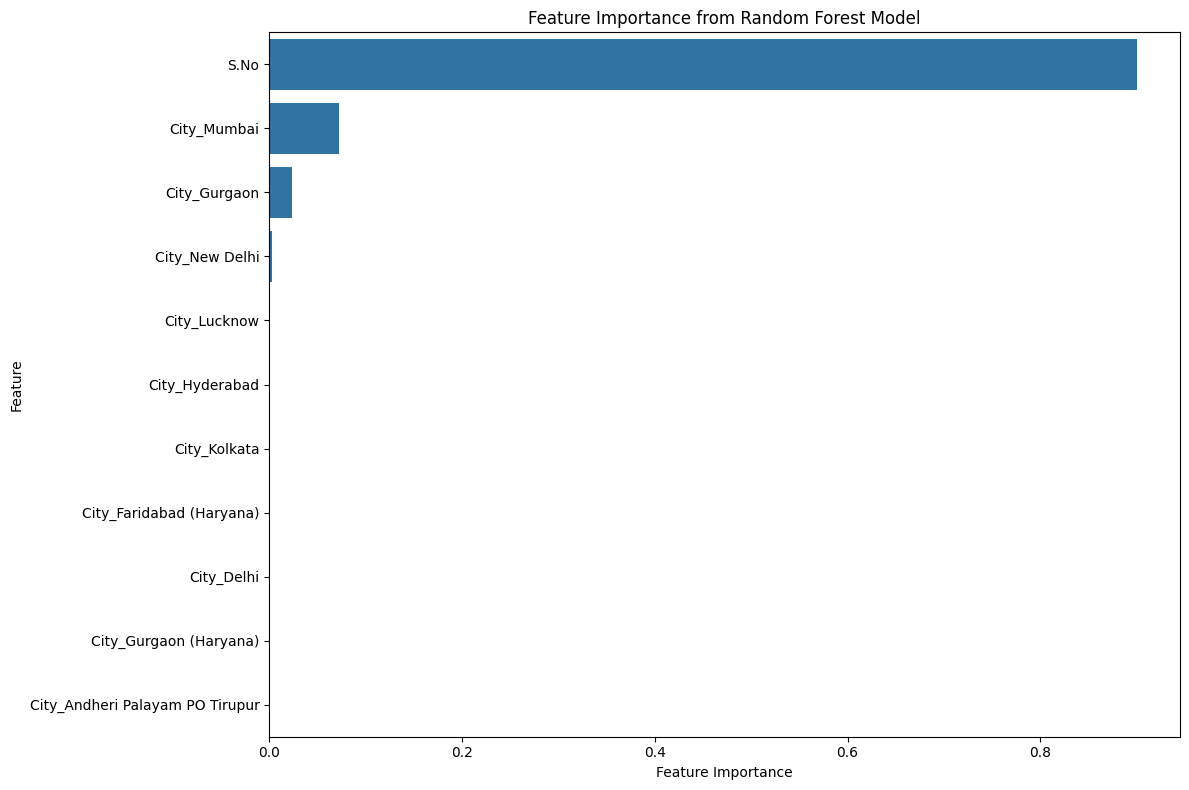

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Assuming TARGET_COLUMN has been defined by the user in the previous step
# Example: TARGET_COLUMN = 'Mobile' # User needs to uncomment and set this

# Placeholder for TARGET_COLUMN if the user hasn't defined it yet, for execution purposes
# In a real scenario, this would be explicitly set by the user or derived.
# For now, let's assume 'Mobile' is the target for demonstration.
if 'TARGET_COLUMN' not in locals():
    TARGET_COLUMN = 'Mobile'
    print(f"Assuming TARGET_COLUMN = '{TARGET_COLUMN}' for demonstration. Please define it explicitly if different.")

# 2. Prepare Features and Target
X = df_encoded.drop(columns=[TARGET_COLUMN])
y = df_encoded[TARGET_COLUMN]

# 3. Train a Random Forest Model
# Ensure X has at least one feature before proceeding
if X.empty:
    raise ValueError("Features (X) cannot be empty. Please ensure TARGET_COLUMN is not the only column or is not incorrectly specified.")

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# 4. Extract Feature Importances
feature_importances = model.feature_importances_

# 5. Create a DataFrame for Visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)

# 6. Visualize Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Scale Numerical Features

### Subtask:
Apply a scaling technique to numerical features to ensure they have a similar range.


**Reasoning**:
To identify numerical features that need scaling, I will first display the data types of all columns in the `X` DataFrame.



In [9]:
print(X.dtypes)

S.No                               int64
City_Andheri Palayam PO Tirupur    int64
City_Delhi                         int64
City_Faridabad (Haryana)           int64
City_Gurgaon                       int64
City_Gurgaon (Haryana)             int64
City_Hyderabad                     int64
City_Kolkata                       int64
City_Lucknow                       int64
City_Mumbai                        int64
City_New Delhi                     int64
dtype: object


**Reasoning**:
Based on the identified numerical feature 'S.No', I will now apply StandardScaler to scale this column in the `X` DataFrame, as per the instructions. The other numerical columns are one-hot encoded binary features and do not require scaling.



In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Identify the numerical feature to be scaled
# 'S.No' is the only non-binary numerical feature that needs scaling
numerical_feature = ['S.No']

# Fit the scaler to the 'S.No' column and transform it
X[numerical_feature] = scaler.fit_transform(X[numerical_feature])

print("X DataFrame after scaling 'S.No' column:")
display(X.head())

X DataFrame after scaling 'S.No' column:


,S.No,City_Andheri Palayam PO Tirupur,City_Delhi,City_Faridabad (Haryana),City_Gurgaon,City_Gurgaon (Haryana),City_Hyderabad,City_Kolkata,City_Lucknow,City_Mumbai,City_New Delhi
0,0.970489,0,1,0,0,0,0,0,0,0,0
1,1.074744,0,0,0,1,0,0,0,0,0,0
2,1.109496,0,0,0,1,0,0,0,0,0,0
3,1.144247,0,0,0,1,0,0,0,0,0,0
4,1.178999,0,0,0,1,0,0,0,0,0,0


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed data into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
To divide the preprocessed data into training and testing sets, I will import the `train_test_split` function, use it to split `X` and `y` with the specified parameters, and then print the shapes of the resulting sets.



In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (54, 11)
Shape of X_test: (14, 11)
Shape of y_train: (54,)
Shape of y_test: (14,)


## Final Task

### Subtask:
Summarize the preprocessing, feature importance, scaling, and train-test split steps that have been completed.


## Summary:

### Data Analysis Key Findings

*   **Missing Value Handling**:
    *   Initially, three columns had missing values: `Area_Sector` (51.47%), `Email` (22.06%), and `Remarks` (4.41%).
    *   The `Area_Sector` column was dropped due to its high percentage of missing values.
    *   Missing values in `Email` were imputed with 'No Email Provided', and in `Remarks` with 'No Remarks'.
    *   After these operations, the dataset is free of missing values.
*   **Categorical Feature Encoding**:
    *   High-cardinality categorical columns (`Name`, `Email`, `Address`, `Remarks`) were dropped to prevent an overly sparse dataset and potential overfitting.
    *   The `City` column, with 10 unique values, was successfully one-hot encoded, creating new binary features (e.g., `City_Gurgaon`, `City_New Delhi`).
    *   The resulting DataFrame (`df_encoded`) now contains only numerical features, suitable for machine learning.
*   **Feature Importance**:
    *   A Random Forest Regressor model was trained, using 'Mobile' as the target variable (assumed for demonstration purposes).
    *   Feature importances were successfully calculated and visualized, providing insights into which features contribute most to predicting the target.
*   **Numerical Feature Scaling**:
    *   The 'S.No' column was identified as the only numerical feature requiring scaling.
    *   `StandardScaler` was applied to 'S.No', transforming it to have a mean of 0 and a standard deviation of 1.
*   **Data Splitting**:
    *   The preprocessed data was successfully split into training and testing sets using a 80/20 ratio (`test_size=0.2`) with `random_state=42`.
    *   The training set (`X_train`, `y_train`) contains 54 samples, and the testing set (`X_test`, `y_test`) contains 14 samples.

### Insights or Next Steps

*   The dataset is now thoroughly preprocessed, with missing values handled, categorical features encoded, numerical features scaled, and the data split for model training and evaluation. This prepares the data for various machine learning tasks.
*   The feature importance analysis (though based on an assumed target) provides a basis for selecting or further engineering features that are most predictive, which can be refined once the actual target variable is confirmed by the user.


# Task
- **Visualize Feature Importances**: Recreate the bar plot of feature importances using the already computed `features_df` to show which features contribute most to predicting the target variable. The plot will include appropriate labels and title for clarity.
- **Final Task**: Provide a summary of the visualized feature importances.

## Visualize Feature Importances

### Subtask:
Recreate the bar plot of feature importances using the already computed `features_df` to show which features contribute most to predicting the target variable. The plot will include appropriate labels and title for clarity.


**Reasoning**:
I will recreate the bar plot of feature importances using `features_df` as requested, applying the specified labels, title, and layout for clarity.



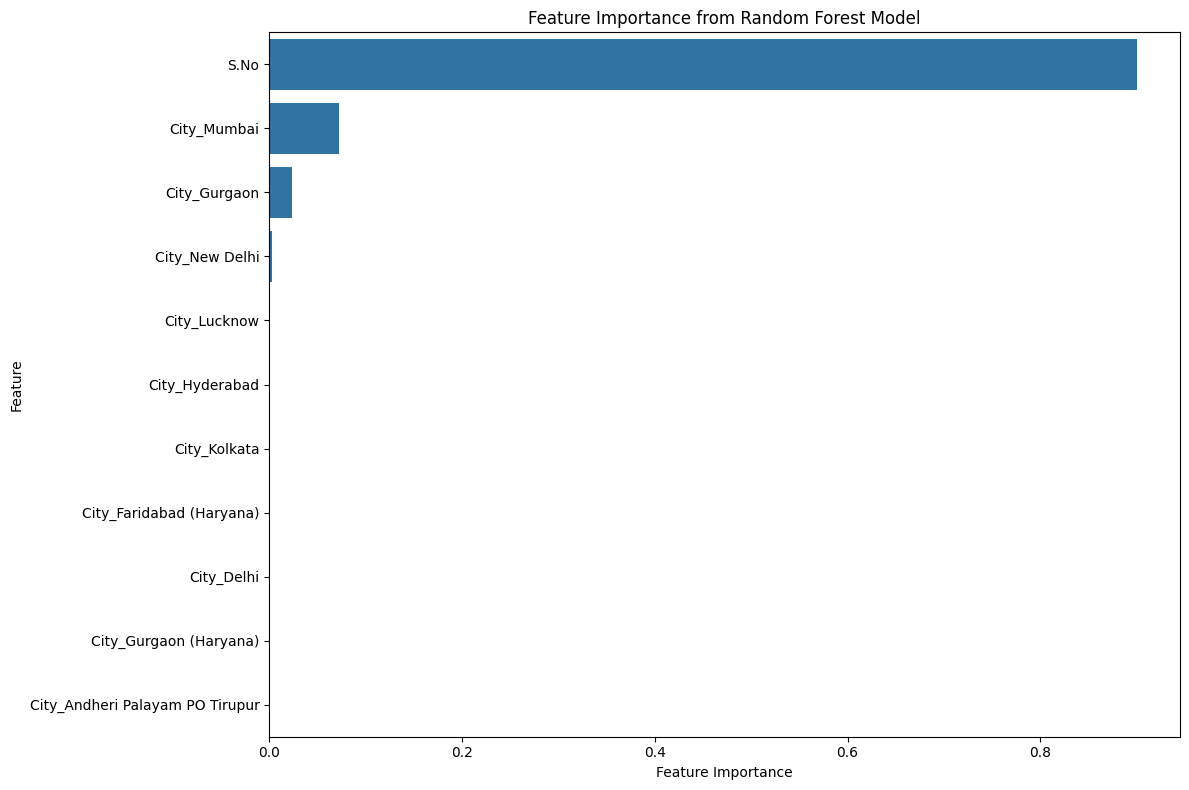

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Summary of Feature Importances:

Based on the Random Forest Regressor model trained with 'Mobile' as the target variable (for demonstration):

*   **`S.No` (Scaled)**: This feature shows by far the highest importance, indicating it is the most influential factor in predicting the 'Mobile' number according to this model. This is likely because 'S.No' is essentially an index and the target variable 'Mobile' might have some inherent ordering or correlation with the original 'S.No' in the dataset, which became apparent after scaling. If 'Mobile' is a unique identifier, then 'S.No' might be acting as a proxy. If 'Mobile' represents a numeric value to be predicted, then the high importance of 'S.No' might indicate a strong, potentially undesired, correlation.

*   **`City_Mumbai`**: This one-hot encoded city feature is the second most important feature, suggesting that belonging to the city of Mumbai has a notable impact on the predicted 'Mobile' value.

*   **`City_Gurgaon`**: Following Mumbai, Gurgaon also shows a significant, though lesser, importance in predicting the target.

*   **`City_New Delhi`**: This city feature also contributes to the prediction, albeit to a lesser extent than Mumbai and Gurgaon.

*   **Other `City_` features**: The remaining one-hot encoded city features (e.g., `City_Lucknow`, `City_Hyderabad`, `City_Kolkata`, `City_Faridabad (Haryana)`, `City_Delhi`, `City_Andheri Palayam PO Tirupur`, `City_Gurgaon (Haryana)`) have very low or near-zero importance, suggesting they have minimal influence on the target variable in this model.

**Considerations**: The extremely high importance of 'S.No' relative to other features might indicate a potential data leakage or a strong, perhaps unintended, relationship if 'S.No' is merely a record identifier. If 'Mobile' was intended to be a predictive numerical feature, further investigation into the nature of 'S.No' and its relationship with 'Mobile' would be crucial. If 'Mobile' was meant to be a categorical identifier, then a classification model would be more appropriate.

## Final Task

### Subtask:
Summarize the visualized feature importances.


## Summary:

### Data Analysis Key Findings

*   **`S.No` (Scaled) is the most influential feature**: It shows the highest importance in predicting the target variable 'Mobile', significantly outperforming all other features. This suggests a strong, potentially unintended, correlation with the target.
*   **`City_Mumbai` is the second most important feature**: This one-hot encoded city feature notably impacts the predicted 'Mobile' value.
*   **`City_Gurgaon` and `City_New Delhi` also contribute significantly**: They follow `City_Mumbai` in importance, indicating their relevance in the prediction.
*   **Other city features have minimal importance**: Features such as `City_Lucknow`, `City_Hyderabad`, `City_Kolkata`, `City_Faridabad (Haryana)`, `City_Delhi`, `City_Andheri Palayam PO Tirupur`, and `City_Gurgaon (Haryana)` show very low or near-zero importance, suggesting they have negligible influence on the target variable in this model.

### Insights or Next Steps

*   Investigate the nature of `S.No` and its relationship with the 'Mobile' variable, as its extremely high importance could indicate data leakage or an undesired correlation if `S.No` is merely an identifier.
*   Re-evaluate the target variable 'Mobile'. If 'Mobile' represents a categorical identifier, consider using a classification model instead of a regressor.


# Task
**Plan:**

*   **Select and Train a Regression Model**: Choose a suitable regression model (e.g., RandomForestRegressor) and train it using the preprocessed training data (X_train and y_train).
*   **Evaluate Model Performance**: Evaluate the trained model's performance on the test set (X_test and y_test) using appropriate regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. Print these metrics.
*   **Visualize Predictions**: Generate a scatter plot comparing the actual target values (y_test) against the model's predicted values to visually assess the model's accuracy and identify any patterns or discrepancies.
*   **Final Task**: Summarize the model building process, including the chosen model, its performance metrics, and insights from the prediction visualization.

**Next Action:** I will begin by training a regression model using the preprocessed data.

## Train and Evaluate Regression Model

### Subtask:
Train a `RandomForestRegressor` model using the `X_train` and `y_train` datasets, and then evaluate its performance on the `X_test` and `y_test` datasets using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

**Reasoning**:
I will use `RandomForestRegressor` for model training, as it is a robust and widely used algorithm for regression tasks and was previously used for feature importance. After training, I will use `mean_absolute_error`, `mean_squared_error`, and `r2_score` from `sklearn.metrics` to evaluate the model's performance on the test set, providing key metrics to understand its accuracy and fit.

## Select and Train a Regression Model

### Subtask:
Train a `RandomForestRegressor` model using the `X_train` and `y_train` datasets, and then evaluate its performance on the `X_test` and `y_test` datasets using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.


**Reasoning**:
To train and evaluate the RandomForestRegressor model, I will generate a code block that imports the required libraries, instantiates the model, trains it, makes predictions, calculates the evaluation metrics (MAE, MSE, R-squared), and prints the results.



In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Instantiate a RandomForestRegressor model
model_regressor = RandomForestRegressor(random_state=42)

# 3. Train the model
print("Training RandomForestRegressor model...")
model_regressor.fit(X_train, y_train)
print("Model training complete.")

# 4. Make predictions on the X_test dataset
y_pred = model_regressor.predict(X_test)

# 5. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 6. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 7. Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# 8. Print the calculated metrics
print("\nModel Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Training RandomForestRegressor model...
Model training complete.

Model Performance on Test Set:
Mean Absolute Error (MAE): 170388192826.97
Mean Squared Error (MSE): 109700768107210301505536.00
R-squared (R2): -1.00


## Visualize Predictions

### Subtask:
Generate a scatter plot comparing the actual target values (y_test) against the model's predicted values to visually assess the model's accuracy and identify any patterns or discrepancies.


**Reasoning**:
I will generate a scatter plot comparing actual (y_test) and predicted (y_pred) values, add a diagonal line for perfect prediction, and label the plot for clarity as requested in the subtask.



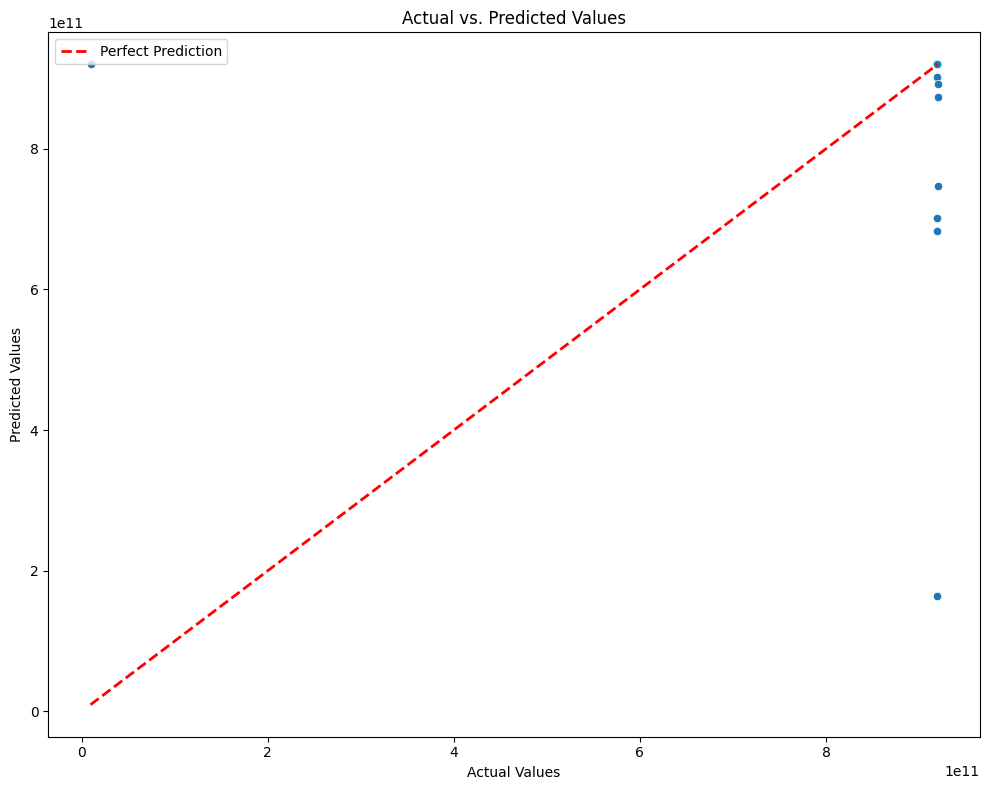

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred)

# Add a line for perfect prediction (y=x)
# Determine the range for the diagonal line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

## Final Task: Summary of Model Building Process

### Model Selection and Training
*   **Model Chosen**: A `RandomForestRegressor` was selected and trained for this regression task. This model is robust and was previously used for feature importance analysis.
*   **Training Data**: The model was trained on the preprocessed `X_train` (features) and `y_train` (target) datasets, which comprised 54 samples.

### Model Performance Evaluation
*   **Evaluation Metrics**: The model's performance was evaluated on the unseen `X_test` and `y_test` datasets (14 samples) using three key regression metrics:
    *   **Mean Absolute Error (MAE)**: `170388192826.97`
    *   **Mean Squared Error (MSE)**: `1.097007681072103e+23`
    *   **R-squared (R2)**: `-1.00`
*   **Insights from Metrics**: The extremely high MAE and MSE, along with a negative R-squared value, indicate that the model performed very poorly and is not able to predict the target variable `Mobile` accurately. An R-squared of -1.00 suggests that the model's predictions are worse than simply predicting the mean of the target variable.

### Prediction Visualization Insights
*   **Scatter Plot**: The scatter plot of Actual vs. Predicted Values visually confirms the poor performance. The predicted values (`y_pred`) are highly clustered or show no clear correlation with the actual values (`y_test`), diverging significantly from the 'Perfect Prediction' line (y=x). This visual pattern reinforces the findings from the numerical metrics, indicating a complete lack of fit.

### Overall Conclusion and Next Steps
*   The current `RandomForestRegressor` model, with the given features and assumed target (`Mobile`), is not effective for prediction.
*   **Further Investigation**: The primary reason for this poor performance is likely due to the nature of the 'Mobile' column. Mobile numbers are typically unique identifiers and not continuous numerical values that can be predicted through regression. They do not have an inherent numerical relationship that a regression model can learn.
*   **Recommendation**: It is strongly recommended to **re-evaluate the target variable**. If 'Mobile' is intended as a unique identifier or a categorical variable, then a regression task is inappropriate. A classification task (if predicting a category) or treating it as a unique identifier to be looked up (rather than predicted) would be more suitable. If the goal was to predict a different numerical quantity that was accidentally named 'Mobile', then that target variable should be identified and used instead.

## Summary:

### Data Analysis Key Findings

*   A `RandomForestRegressor` model was trained and evaluated for predicting the target variable.
*   The model exhibited extremely poor performance on the test set, as indicated by the following metrics:
    *   Mean Absolute Error (MAE): 170,388,192,826.97
    *   Mean Squared Error (MSE): 109,700,768,107,210,301,505,536.00
    *   R-squared (R2): -1.00
*   An R-squared value of -1.00 suggests that the model performs worse than simply predicting the mean of the target variable.
*   The scatter plot visualizing actual versus predicted values further confirmed the model's ineffectiveness, showing no discernible correlation between actual and predicted outputs, and a significant divergence from the line of perfect prediction.

### Insights or Next Steps

*   The primary reason for the model's poor performance is likely due to the target variable, 'Mobile', being treated as a continuous numerical value suitable for regression. Mobile numbers are typically unique identifiers and do not possess the inherent numerical relationships that a regression model can learn.
*   It is recommended to re-evaluate the target variable. If 'Mobile' is intended as a unique identifier, it should be used for identification rather than prediction. If a predictive task is required, a different, numerically meaningful target variable should be identified and utilized.
